# Toxic comments classification
Authored by Elina Yancheva and Vladimir Stoyanov

In [4]:
import pandas as pd
import re
import string
pd.options.display.max_colwidth = 100

In [5]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [6]:
train.head(n=10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the tools well. · talk """,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,"Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or ...",0,0,0,0,0,0
8,00037261f536c51d,"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything i...",0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contrary to those of DuLithgow,0,0,0,0,0,0


In [7]:
test.head(n=10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofu...
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can on..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very highly of you and would not revert without discussion.
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such edits are considered vandalism and quickly undone....
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. \n The correct number lies between 10 000 to 15 00..."
9,00026d1092fe71cc,"== Double Redirects == \n\n When fixing double redirects, don't just blank the outer one, you ne..."


In [8]:
# Count of train and test data
print("Train data shape: ", train.shape)
print("Test data shape: ", test.shape)

Train data shape:  (159571, 8)
Test data shape:  (153164, 2)


# Data Preparation

## Noise Removal

In [9]:
# check for urls  in the text
def is_url_in_text(text):
    return ('http' or 'www') in text

train['url_in_text'] = train['comment_text'].apply(is_url_in_text)
display(train[train['url_in_text']].head(n=10)[['comment_text', 'url_in_text']])

# remove urls
def remove_URL(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

train['comment_text'] = train['comment_text'].apply(remove_URL)
# display the if there is a url in the text
print("After link removal")
display(train[train['url_in_text']].head(n=10)[['comment_text', 'url_in_text']])
train.drop(columns=['url_in_text'], inplace=True)

# demonstrate remove url
string_with_http = """
This is a string with a url: https://www.kaggle.com 
This is another url: glued_text_http://www.google.com and some more text
This is not http but \nwww.google.com this was it
"""
print(remove_URL(string_with_http))

,comment_text,url_in_text
22,"""\n\n Snowflakes are NOT always symmetrical! \n\nUnder Geometry it is stated that """"A snowflake ...",True
33,I was able to post the above list so quickly because I already had it in a text file in my hard ...,True
73,"""\n Ambiguous ? \nSo Mabuska Irish can mean more than one thing ? I will qoute you on that .Than...",True
91,Transliteration of Russian place names\nIn writing about Moscow Metro for the Malayalam Wikipedi...,True
101,Check the following websites:\n\nhttp://www.iranchamber.com/personalities/farabi/farabi.php\nhtt...,True
117,Also see this if you cant trust Murkoth Ramunni\nhttp://books.google.com/books?id=HHev0U1GfpEC&p...,True
123,Should say something about his views as an educationalist and socialist political commentator.\n...,True
188,George W. Bush approval rating graph \n\nhttp://upload.wikimedia.org/wikipedia/commons/1/10/Geor...,True
217,And check this out: http://www.cla.purdue.edu/blackmon/102cs2001/critical.html#bio,True
228,http://www.users.bigpond.com/MONTDALE/page8.html Heritage from village Κρανιώνας in macedonian ...,True


After link removal


,comment_text,url_in_text
22,"""\n\n Snowflakes are NOT always symmetrical! \n\nUnder Geometry it is stated that """"A snowflake ...",True
33,I was able to post the above list so quickly because I already had it in a text file in my hard ...,True
73,"""\n Ambiguous ? \nSo Mabuska Irish can mean more than one thing ? I will qoute you on that .Than...",True
91,Transliteration of Russian place names\nIn writing about Moscow Metro for the Malayalam Wikipedi...,True
101,Check the following websites:\n\n\n\n,True
117,Also see this if you cant trust Murkoth Ramunni\n,True
123,Should say something about his views as an educationalist and socialist political commentator.\n...,True
188,George W. Bush approval rating graph \n\n\n\nThe circle for the September 11th attacks looks too...,True
217,And check this out:,True
228,Heritage from village Κρανιώνας in macedonian Дреновени. Sources claim that the village was pu...,True



This is a string with a url:  
This is another url: glued_text_ and some more text
This is not http but 
 this was it



In [10]:
# check for emails in the text
def is_email_in_text(text):
    return re.match(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", text) is not None

def remove_email(text):
    return re.sub(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", '', text)

train['email_in_text'] = train['comment_text'].apply(is_email_in_text)
display(train[train['email_in_text']].head(n=10)[['comment_text', 'email_in_text']])

train['comment_text'] = train['comment_text'].apply(remove_email)
train.drop(columns=['email_in_text'], inplace=True)


,comment_text,email_in_text
130194,hyper_individualist@yahoo.com,True


In [11]:
# Remove if not printable

def remove_non_ascii(text):
    return ''.join([x for x in text if x in string.printable]) 
train['comment_text'] = train['comment_text'].apply(remove_non_ascii)

Comments often contain slang and abbreviations so it's important to "translate" these terms

In [12]:
def clean_text(text):
    """
    Clean text by replacing slang, acronyms, and abbreviations with their full forms
    
    Args:
        text (str or float/int): Input text to clean. Will handle NaN/None values
        
    Returns:
        str: Cleaned text with replacements
    """
    # Handle non-string inputs (like NaN, None, or numeric values)
    if not isinstance(text, str):
        return text

    # Create regex patterns for each dictionary
    patterns = {
        'typos_slang': re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in typos_slang.keys()) + r')(?!\w)'),
        'acronyms': re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in acronyms.keys()) + r')(?!\w)'),
        'abbreviations': re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in abbreviations.keys()) + r')(?!\w)')
    }
    
    # Perform replacements
    text = patterns['typos_slang'].sub(lambda x: typos_slang[x.group()], text)
    text = patterns['acronyms'].sub(lambda x: acronyms[x.group()], text)
    text = patterns['abbreviations'].sub(lambda x: abbreviations[x.group()], text)
    
    return text

# Typos, slang and other
typos_slang = {
                        "w/e": "whatever",
                        "usagov": "usa government",
                        "recentlu": "recently",
                        "ph0tos": "photos",
                        "amirite": "am i right",
                        "exp0sed": "exposed",
                        "<3": "love",
                        "luv": "love",
                        "amageddon": "armageddon",
                        "trfc": "traffic",
                        "16yr": "16 year"
                        }

# Acronyms
acronyms =  { 
                    "2mw": "tomorrow"
                    }

# Some common abbreviations 
abbreviations = {
                "$" : " dollar ",
                "€" : " euro ",
                "4ao" : "for adults only",
                "a.m" : "before midday",
                "a3" : "anytime anywhere anyplace",
                "aamof" : "as a matter of fact",
                "acct" : "account",
                "adih" : "another day in hell",
                "afaic" : "as far as i am concerned",
                "afaict" : "as far as i can tell",
                "afaik" : "as far as i know",
                "afair" : "as far as i remember",
                "afk" : "away from keyboard",
                "app" : "application",
                "approx" : "approximately",
                "apps" : "applications",
                "asap" : "as soon as possible",
                "asl" : "age, sex, location",
                "atk" : "at the keyboard",
                "ave." : "avenue",
                "aymm" : "are you my mother",
                "ayor" : "at your own risk", 
                "b&b" : "bed and breakfast",
                "b+b" : "bed and breakfast",
                "b.c" : "before christ",
                "b2b" : "business to business",
                "b2c" : "business to customer",
                "b4" : "before",
                "b4n" : "bye for now",
                "b@u" : "back at you",
                "bae" : "before anyone else",
                "bak" : "back at keyboard",
                "bbbg" : "bye bye be good",
                "bbc" : "british broadcasting corporation",
                "bbias" : "be back in a second",
                "bbl" : "be back later",
                "bbs" : "be back soon",
                "be4" : "before",
                "bfn" : "bye for now",
                "blvd" : "boulevard",
                "bout" : "about",
                "brb" : "be right back",
                "bros" : "brothers",
                "brt" : "be right there",
                "bsaaw" : "big smile and a wink",
                "btw" : "by the way",
                "bwl" : "bursting with laughter",
                "c/o" : "care of",
                "cet" : "central european time",
                "cf" : "compare",
                "cia" : "central intelligence agency",
                "csl" : "can not stop laughing",
                "cu" : "see you",
                "cul8r" : "see you later",
                "cv" : "curriculum vitae",
                "cwot" : "complete waste of time",
                "cya" : "see you",
                "cyt" : "see you tomorrow",
                "dae" : "does anyone else",
                "dbmib" : "do not bother me i am busy",
                "diy" : "do it yourself",
                "dm" : "direct message",
                "dwh" : "during work hours",
                "e123" : "easy as one two three",
                "eet" : "eastern european time",
                "eg" : "example",
                "embm" : "early morning business meeting",
                "encl" : "enclosed",
                "encl." : "enclosed",
                "etc" : "and so on",
                "faq" : "frequently asked questions",
                "fawc" : "for anyone who cares",
                "fb" : "facebook",
                "fc" : "fingers crossed",
                "fig" : "figure",
                "fimh" : "forever in my heart", 
                "ft." : "feet",
                "ft" : "featuring",
                "ftl" : "for the loss",
                "ftw" : "for the win",
                "fwiw" : "for what it is worth",
                "fyi" : "for your information",
                "g9" : "genius",
                "gahoy" : "get a hold of yourself",
                "gal" : "get a life",
                "gcse" : "general certificate of secondary education",
                "gfn" : "gone for now",
                "gg" : "good game",
                "gl" : "good luck",
                "glhf" : "good luck have fun",
                "gmt" : "greenwich mean time",
                "gmta" : "great minds think alike",
                "gn" : "good night",
                "g.o.a.t" : "greatest of all time",
                "goat" : "greatest of all time",
                "goi" : "get over it",
                "gps" : "global positioning system",
                "gr8" : "great",
                "gratz" : "congratulations",
                "gyal" : "girl",
                "h&c" : "hot and cold",
                "hp" : "horsepower",
                "hr" : "hour",
                "hrh" : "his royal highness",
                "ht" : "height",
                "ibrb" : "i will be right back",
                "ic" : "i see",
                "icq" : "i seek you",
                "icymi" : "in case you missed it",
                "idc" : "i do not care",
                "idgadf" : "i do not give a damn fuck",
                "idgaf" : "i do not give a fuck",
                "idk" : "i do not know",
                "ie" : "that is",
                "i.e" : "that is",
                "ifyp" : "i feel your pain",
                "IG" : "instagram",
                "iirc" : "if i remember correctly",
                "ilu" : "i love you",
                "ily" : "i love you",
                "imho" : "in my humble opinion",
                "imo" : "in my opinion",
                "imu" : "i miss you",
                "iow" : "in other words",
                "irl" : "in real life",
                "j4f" : "just for fun",
                "jic" : "just in case",
                "jk" : "just kidding",
                "jsyk" : "just so you know",
                "l8r" : "later",
                "lb" : "pound",
                "lbs" : "pounds",
                "ldr" : "long distance relationship",
                "lmao" : "laugh my ass off",
                "lmfao" : "laugh my fucking ass off",
                "lol" : "laughing out loud",
                "ltd" : "limited",
                "ltns" : "long time no see",
                "m8" : "mate",
                "mf" : "motherfucker",
                "mfs" : "motherfuckers",
                "mfw" : "my face when",
                "mofo" : "motherfucker",
                "mph" : "miles per hour",
                "mr" : "mister",
                "mrw" : "my reaction when",
                "ms" : "miss",
                "mte" : "my thoughts exactly",
                "nagi" : "not a good idea",
                "nbc" : "national broadcasting company",
                "nbd" : "not big deal",
                "nfs" : "not for sale",
                "ngl" : "not going to lie",
                "nhs" : "national health service",
                "nrn" : "no reply necessary",
                "nsfl" : "not safe for life",
                "nsfw" : "not safe for work",
                "nth" : "nice to have",
                "nvr" : "never",
                "nyc" : "new york city",
                "oc" : "original content",
                "og" : "original",
                "ohp" : "overhead projector",
                "oic" : "oh i see",
                "omdb" : "over my dead body",
                "omg" : "oh my god",
                "omw" : "on my way",
                "p.a" : "per annum",
                "p.m" : "after midday",
                "pm" : "prime minister",
                "poc" : "people of color",
                "pov" : "point of view",
                "pp" : "pages",
                "ppl" : "people",
                "prw" : "parents are watching",
                "ps" : "postscript",
                "pt" : "point",
                "ptb" : "please text back",
                "pto" : "please turn over",
                "qpsa" : "what happens", #"que pasa",
                "ratchet" : "rude",
                "rbtl" : "read between the lines",
                "rlrt" : "real life retweet", 
                "rofl" : "rolling on the floor laughing",
                "roflol" : "rolling on the floor laughing out loud",
                "rotflmao" : "rolling on the floor laughing my ass off",
                "rt" : "retweet",
                "ruok" : "are you ok",
                "sfw" : "safe for work",
                "sk8" : "skate",
                "smh" : "shake my head",
                "sq" : "square",
                "srsly" : "seriously", 
                "ssdd" : "same stuff different day",
                "tbh" : "to be honest",
                "tbs" : "tablespooful",
                "tbsp" : "tablespooful",
                "tfw" : "that feeling when",
                "thks" : "thank you",
                "tho" : "though",
                "thx" : "thank you",
                "tia" : "thanks in advance",
                "til" : "today i learned",
                "tl;dr" : "too long i did not read",
                "tldr" : "too long i did not read",
                "tmb" : "tweet me back",
                "tntl" : "trying not to laugh",
                "ttyl" : "talk to you later",
                "u" : "you",
                "u2" : "you too",
                "u4e" : "yours for ever",
                "utc" : "coordinated universal time",
                "w/" : "with",
                "w/o" : "without",
                "w8" : "wait",
                "wassup" : "what is up",
                "wb" : "welcome back",
                "wtf" : "what the fuck",
                "wtg" : "way to go",
                "wtpa" : "where the party at",
                "wuf" : "where are you from",
                "wuzup" : "what is up",
                "wywh" : "wish you were here",
                "yd" : "yard",
                "ygtr" : "you got that right",
                "ynk" : "you never know",
                "zzz" : "sleeping bored and tired"
                }
    
text = """
"omw 2mw w/ bae tbh idk what's gonna happen l8r <3"
            "gr8 job tbh, imo ur the best!" 42 
"""

print(f"Manual text cleaning demo: \n before: {text}\n after: {clean_text(text)}")

train['comment_text'] = train['comment_text'].apply(clean_text)

Manual text cleaning demo: 
 before: 
"omw 2mw w/ bae tbh idk what's gonna happen l8r <3"
            "gr8 job tbh, imo ur the best!" 42 

 after: 
"on my way tomorrow with before anyone else to be honest i do not know what's gonna happen later love"
            "great job to be honest, in my opinion ur the best!" 42 



# Data analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import torch
from torch import nn
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

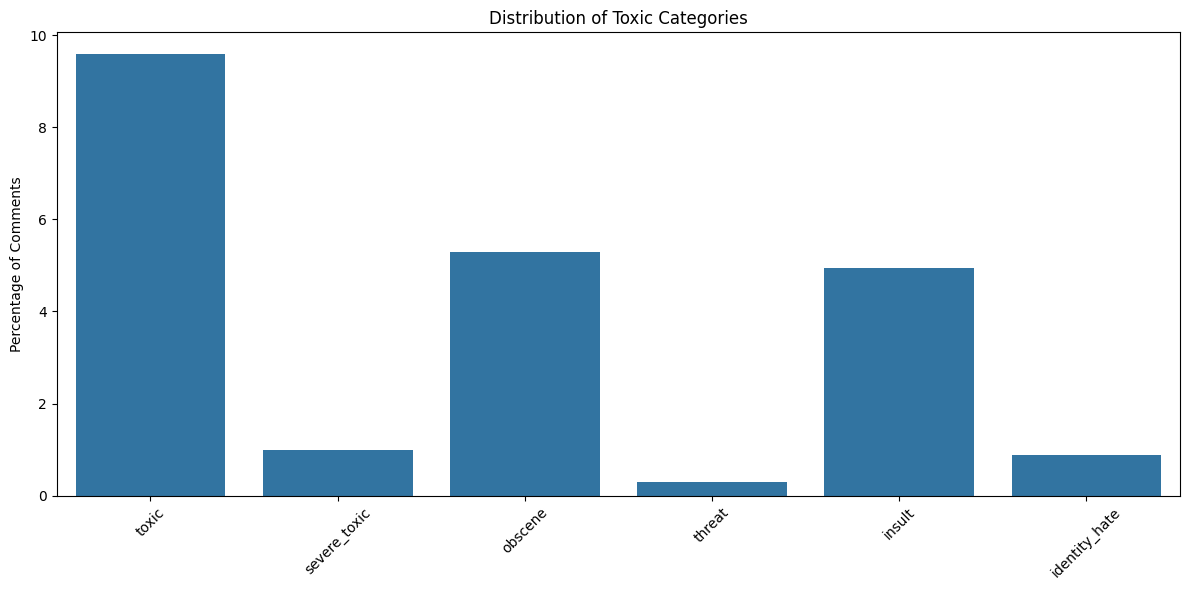

In [14]:
# Analyze the distribution of different toxic categories
def plot_category_distribution(df):
    categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    plt.figure(figsize=(12, 6))
    
    percentages = [(df[category].sum() / len(df)) * 100 for category in categories]
    
    sns.barplot(x=categories, y=percentages)
    plt.title('Distribution of Toxic Categories')
    plt.ylabel('Percentage of Comments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_category_distribution(train)

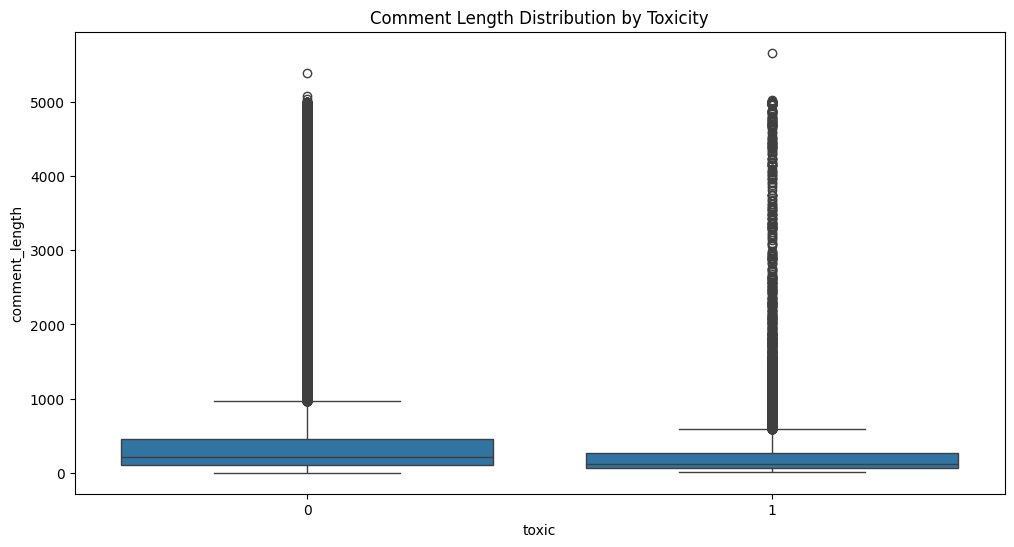

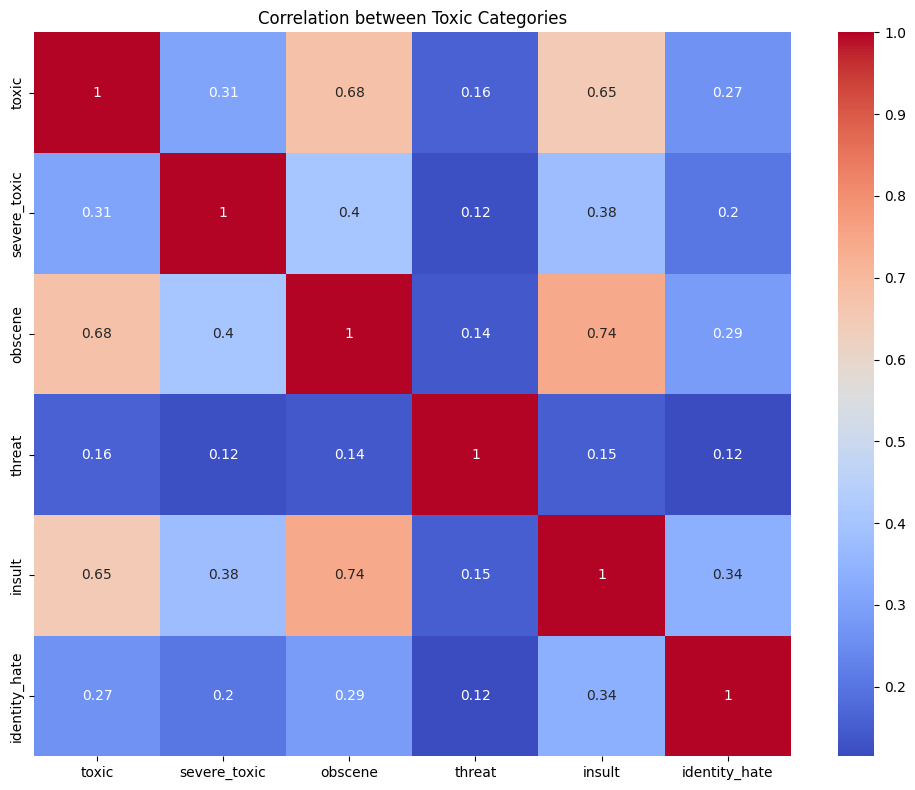

In [15]:
# Analyze comment lengths
train["comment_length"] = train["comment_text"].str.len()
plt.figure(figsize=(12, 6))
sns.boxplot(x="toxic", y="comment_length", data=train)
plt.title("Comment Length Distribution by Toxicity")
plt.show()

# Create a correlation matrix of different toxic categories
correlation_matrix = train[
    ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between Toxic Categories")
plt.tight_layout()
plt.show()
